Seeding For Reproducibility


In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

Importing necessary files

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Input
import matplotlib.pyplot as plt

In [3]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.94):# Experiment with changing this value
            print("\nReached 94% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

Data Curation

In [4]:
f_mnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=f_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Data Preprocessing

In [5]:
type(training_images)

numpy.ndarray

In [6]:
type(training_labels)

numpy.ndarray

In [7]:
print(len(training_images))
print(len(training_labels))
print(len(test_images))
print(len(test_labels))

60000
60000
10000
10000


In [8]:
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [9]:
tf.shape(training_images)


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([60000,    28,    28], dtype=int32)>

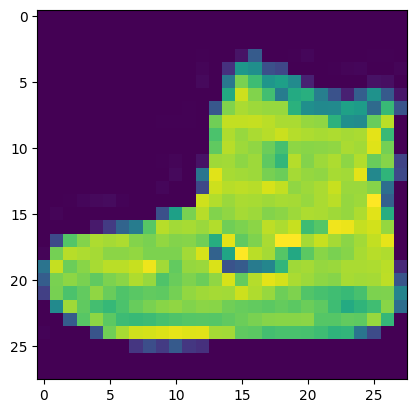

In [10]:
plt.imshow(training_images[0])
plt.show()

In [11]:
print(training_labels[0])

9


list_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

Normalize the image

In [12]:
training_images=training_images/255
test_images=test_images/255

In [13]:
training_images=training_images.reshape(60000,28,28,1)
test_images=test_images.reshape(10000,28,28,1)

In [14]:
training_images.shape

(60000, 28, 28, 1)

In [15]:
test_images.shape

(10000, 28, 28, 1)

Covulutional Layer

In [23]:
model=Sequential([Input(shape=(28, 28, 1)),Conv2D(64,(3,3),activation='relu'),
                 MaxPooling2D(2,2),Conv2D(64,(3,3),activation='relu'),MaxPooling2D(2,2),
                 Flatten(),
                 Dense(1024,activation='relu'),
                 Dense(10,activation='softmax')
                 ])
#Model Summary
model.summary()

#use same settings
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

print('\nModel Training:')
#Train the model
history= model.fit(training_images,training_labels,epochs=5,validation_data=(test_images, test_labels),callbacks=[callbacks])

#Test the model
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print(f'Test accuracy: {test_accuracy}')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)             

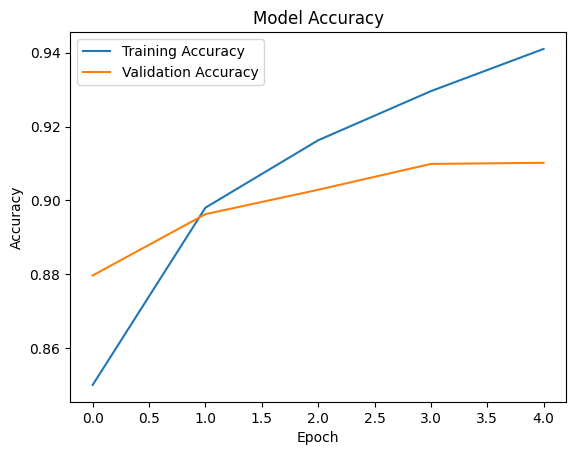

In [24]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

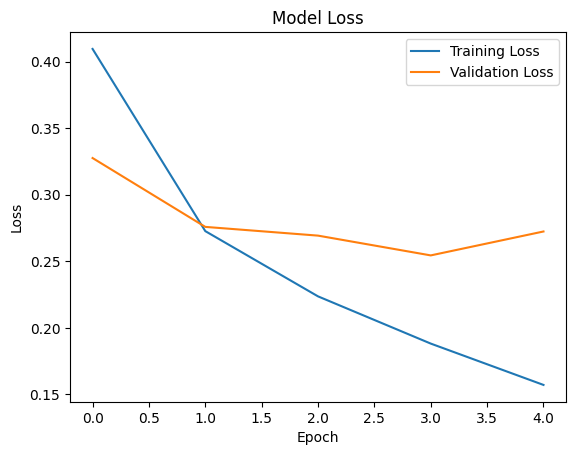

In [25]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model.save('fashion_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
